In [54]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.optimize import fmin

<img src="img_1.png">

In [3]:
alpha_1 = lambda x: x*0.5
alpha_2 = lambda x: -x**3/3*0.5
alpha_3 = lambda x: 2*x**5/15*0.5
alpha_4 = lambda x: -17*x**7/315*0.5
alpha = [alpha_1, alpha_2, alpha_3, alpha_4]


beta_1 = lambda y: y
beta_2 = lambda y: y**3
beta_3 = lambda y: y**5
beta_4 = lambda y: y**7
beta = [beta_1, beta_2, beta_3, beta_4]

h = lambda x,y: 0.5*np.tanh(x*y)
f = lambda x: x-0.5
h_taylor_3 = lambda x,y : np.sum([alpha[i](x) * beta[i](y) for i in range(3)])
h_taylor_4 = lambda x,y : np.sum([alpha[i](x) * beta[i](y) for i in range(4)])

In [4]:
b = np.array([quad(lambda x:beta[i](x)*f(x),0,1)[0] for i in range(3)])
b_4 = np.array([quad(lambda x:beta[i](x)*f(x),0,1)[0] for i in range(4)])

In [5]:
b

array([0.08333333, 0.075     , 0.05952381])

In [6]:
gamma = np.array([[quad(lambda x: beta[i](x)*alpha[j](x),0,1)[0] for j in range(3)] for i in range(3)])

gamma_4 =  np.array([[quad(lambda x: beta[i](x)*alpha[j](x),0,1)[0] for j in range(4)] for i in range(4)])

In [7]:
gamma

array([[ 0.16666667, -0.03333333,  0.00952381],
       [ 0.1       , -0.02380952,  0.00740741],
       [ 0.07142857, -0.01851852,  0.00606061]])

In [8]:
a = np.array([[(i == j) - gamma[i][j] for j in range(3)] for i in range(3)])

a_4 = np.array([[(i == j) - gamma_4[i][j] for j in range(4)] for i in range(4)])

In [9]:
a

array([[ 0.83333333,  0.03333333, -0.00952381],
       [-0.1       ,  1.02380952, -0.00740741],
       [-0.07142857,  0.01851852,  0.99393939]])

In [10]:
c = np.linalg.solve(a, b)
c_4 = np.linalg.solve(a_4, b_4)

In [11]:
c

array([0.09741696, 0.08324368, 0.06533659])

In [13]:
c_4

array([0.09723075, 0.08309764, 0.06521526, 0.05299287])

In [14]:
u_3 = lambda x: f(x) + sum([c[i] * alpha[i](x) for i in range(3)])
#u_3 = lambda x: f(x) + quad(lambda y: resolv_3(x,y)*f(y),0,1)[0]


u_4 = lambda x: f(x) + sum([c_4[i] * alpha[i](x) for i in range(4)])

In [47]:
print(u_3(0),u_3(0.5),u_3(1))

-0.5 0.022756113808719836 0.5391903049374953


In [48]:
print(u_4(0),u_4(0.5),u_4(1))

-0.5 0.02270118010711082 0.5376834862701934


In [50]:
delta = max([abs(u_3(0)-u_4(0)),abs(u_3(0.5)-u_4(0.5)),abs(u_3(1)-u_4(1))])
delta

0.0015068186673019568

In [57]:
norm = lambda x: -abs(u_3(x)-u_4(x)) if (x >= 0 and x<=1) else 0

In [62]:
fmin(norm,0)

Optimization terminated successfully.
         Current function value: -0.001506
         Iterations: 29
         Function evaluations: 58


array([0.999875])

In [63]:
d = np.linalg.inv(a)

In [67]:
g = lambda x,y :abs(np.sum([np.sum([d[i][j] * alpha[i](x)*beta[j](y) for j in range(3)]) for i in range(3)]))

In [68]:
g(0,1)

0.0

In [74]:
m = lambda x: quad(lambda y: g(x,y),0 ,1)[0]

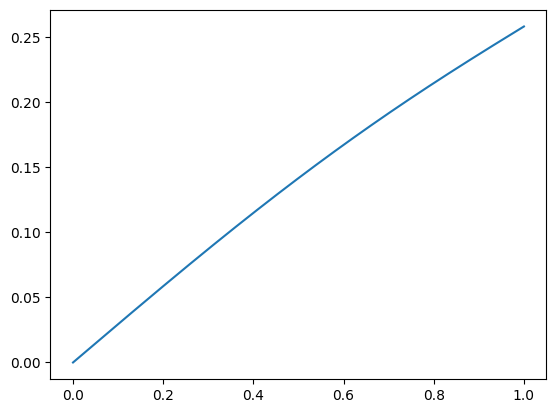

In [75]:
t = np.linspace(0, 1, 1000)
val = [m(i) for i in t]
plt.plot(t, val)

In [76]:
val[-1]

0.2581795735481403

In [82]:
B = 0.3

In [89]:
m_2 = lambda x,y: abs(h_taylor_3(x,y)-h(x,y))

In [90]:
m_3 = lambda x: quad(lambda y: m_2(x,y),0 ,1)[0]

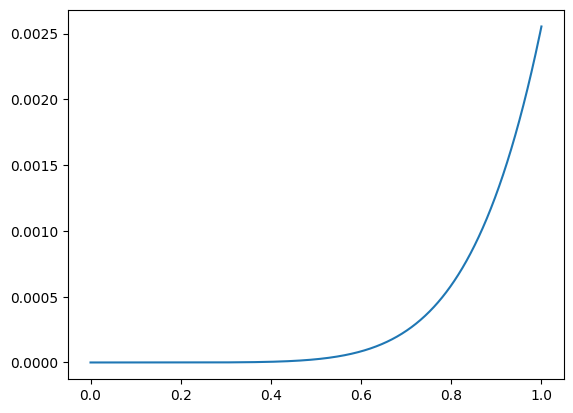

In [91]:
t = np.linspace(0, 1, 1000)
val = [m_3(i) for i in t]
plt.plot(t, val)

In [92]:
val[-1]

0.0025540292029308555

In [95]:
ETA = 0.003

In [2]:
(1+B)*ETA/((1-(1+B)*ETA))

NameError: name 'B' is not defined

In [87]:
dif = lambda x: u_4(x)-u_3(x)

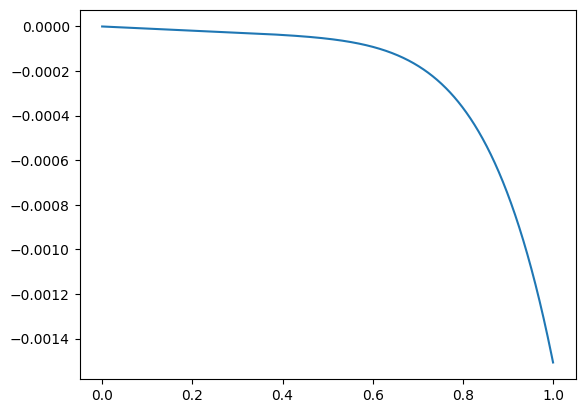

In [88]:
val = [dif(i) for i in t]
plt.plot(t,val)

In [114]:
m = 1000
def get_grid(m):
    return np.linspace(0, 1, 2 * m + 1)

coef = lambda x:  2 / 3 if x % 2  else 1 / 6
dif = 100
u_old = None
eps = 0.000000001

In [115]:
while dif > eps:
    grid = get_grid(m)
    gamma_d = np.array([[coef(j)*h(grid[i], grid[j] ) for j in range (len(grid))] for i in range(len(grid))])
    d = np.array([[ (i == j) - gamma_d[i][j] for j in range(len(gamma_d))] for i in range(len(gamma_d))] )
    g = np.array([f(node) for node in grid])
    c_q = np.linalg.solve(d,g)
    u_q = lambda x: sum(np.array([coef(i) * h(x, grid[i])*c_q[i] for i in range(len(c_q))]))+f(x)

    if u_old is not None:
        dif = max([abs(u_q(0) - u_old(0)),abs(u_q(0.5) - u_old(0.5)),abs(u_q(1) - u_old(1))])
    u_old = u_q
    m*=2

In [116]:
m


4000

In [117]:
print(u_q(0),u_q(0.5),u_q(1))
print(u_old(0),u_old(0.5),u_old(1))

-0.5 0.042193014839095676 -0.11668098005825844
-0.5 0.042193014839095676 -0.11668098005825844


In [118]:
print(u_q(0),u_q(0.5),u_q(1))
print(u_3(0),u_3(0.5),u_3(1))
print(u_4(0),u_4(0.5),u_4(1))

-0.5 0.042193014839095676 -0.11668098005825844
-0.5 0.022756113808719836 0.5391903049374953
-0.5 0.02270118010711082 0.5376834862701934


In [24]:
gamma_d

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.25925926e-09, 4.62962963e-09, ...,
        1.38842591e-05, 5.55462958e-05, 1.38888888e-05],
       [0.00000000e+00, 1.85185185e-08, 9.25925926e-09, ...,
        2.77685175e-05, 1.11092588e-04, 2.77777767e-05],
       ...,
       [0.00000000e+00, 5.55370365e-05, 2.77685175e-05, ...,
        6.34428398e-02, 2.53794704e-01, 6.34545107e-02],
       [0.00000000e+00, 5.55462958e-05, 2.77731471e-05, ...,
        6.34486760e-02, 2.53818047e-01, 6.34603459e-02],
       [0.00000000e+00, 5.55555550e-05, 2.77777767e-05, ...,
        6.34545107e-02, 2.53841384e-01, 6.34661797e-02]])

In [25]:
gamma_d.shape

(6001, 6001)

In [119]:
u_3_plot = np.array([u_3(node) for node in grid])
u_4_plot = np.array([u_4(node) for node in grid])
u_q_plot = np.array([u_q(node) for node in grid])

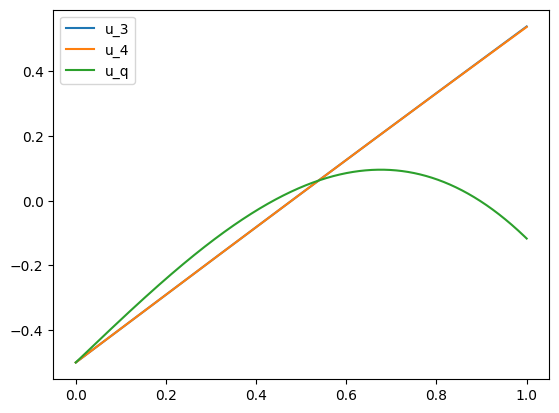

In [120]:
plt.plot(grid, u_3_plot, label="u_3")
plt.plot(grid, u_4_plot, label="u_4")
plt.plot(grid, u_q_plot, label="u_q")
plt.legend()